Covid Infection (cases) Prediction for the Next Month (30 days) using A machine learning approach called Prophet forecasting model. 

In [1]:
#importing the necessary Python libraries and the dataset:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from fbprophet import Prophet
from sklearn.metrics import r2_score

In [3]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
plt.style.use("ggplot")

#import and read data
df0 = pd.read_csv("../python/covid/CONVENIENT_global_confirmed_cases.csv")
df1 = pd.read_csv("../python/covid/CONVENIENT_global_deaths.csv")

In [61]:
# show first few rows of CONVENIENT_global_confirmed_cases.csv
df0.sample(3)

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
296,11/13/20,186.0,490.0,867.0,109.0,175.0,2.0,11859.0,1703.0,0.0,...,27301.0,88.0,194.0,0.0,301.0,3.0,730.0,0.0,37.0,69.0
685,12/7/21,9.0,393.0,197.0,184.0,42.0,0.0,3089.0,240.0,8.0,...,45102.0,237.0,147.0,0.0,543.0,13840.0,402.0,9.0,47.0,2555.0
257,10/5/20,81.0,144.0,134.0,260.0,128.0,0.0,11242.0,181.0,0.0,...,12593.0,10.0,334.0,0.0,683.0,1.0,459.0,0.0,37.0,10.0


In [62]:
# show first few rows of CONVENIENT_global_deaths.csv
df1.sample(3)

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
581,8/25/21,7.0,3.0,33.0,0.0,10.0,0.0,160.0,10.0,0.0,...,149.0,2.0,8.0,0.0,16.0,335.0,8.0,14.0,3.0,18.0
188,7/28/20,1.0,4.0,11.0,0.0,6.0,0.0,120.0,8.0,0.0,...,21.0,0.0,3.0,0.0,5.0,0.0,1.0,1.0,2.0,4.0
325,12/12/20,10.0,12.0,9.0,0.0,1.0,0.0,62.0,17.0,0.0,...,520.0,1.0,0.0,0.0,5.0,0.0,30.0,0.0,1.0,1.0


In [11]:
#print a concise summary of the two DataFrames.
print(df0.info())
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Columns: 281 entries, Country/Region to Zimbabwe
dtypes: float64(193), object(88)
memory usage: 1.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Columns: 281 entries, Country/Region to Zimbabwe
dtypes: float64(193), object(88)
memory usage: 1.5+ MB
None


In [12]:
#view some basic statistical details like percentile, mean, std etc.
print(df0.describe())
print(df1.describe())

       Afghanistan      Albania      Algeria     Andorra       Angola  \
count   691.000000   691.000000   691.000000  691.000000   691.000000   
mean    228.144718   295.115774   308.332851   28.133140    94.651230   
std     401.866752   322.254299   297.922919   53.568184   119.046897   
min    -210.000000     0.000000     0.000000    0.000000     0.000000   
25%      22.000000    18.500000   127.000000    0.000000     9.000000   
50%      71.000000   146.000000   201.000000    8.000000    58.000000   
75%     221.000000   536.500000   397.000000   38.000000   134.500000   
max    3243.000000  1239.000000  1927.000000  621.000000  1493.000000   

       Antigua and Barbuda     Argentina      Armenia       Austria  \
count           691.000000    691.000000   691.000000    691.000000   
mean              6.023155   7754.638205   495.808973   1783.218524   
std              21.756812   8096.070247   541.993129   2625.373613   
min              -1.000000      0.000000     0.000000     

Data Preparation

In [4]:
# prepare new data by combining the two datasets and 
# visualize a geographical plot of the data
world = pd.DataFrame({"Country":[],"Cases":[]})
world["Country"] = df0.iloc[:,1:].columns
cases = []
for i in world["Country"]:
    cases.append(pd.to_numeric(df0[i][1:]).sum())
world["Cases"]=cases

country_list=list(world["Country"].values)
idx = 0
for i in country_list:
    sayac = 0
    for j in i:
        if j==".":
            i = i[:sayac]
            country_list[idx]=i
        elif j=="(":
            i = i[:sayac-1]
            country_list[idx]=i
        else:
            sayac += 1
    idx += 1
world["Country"]=country_list
world = world.groupby("Country")["Cases"].sum().reset_index()
world.head()

continent=pd.read_csv("../python/covid//continents2.csv")
continent["name"]=continent["name"].str.upper()
continent["name"]

0                               AFGHANISTAN
1                             ÅLAND ISLANDS
2                                   ALBANIA
3                                   ALGERIA
4                            AMERICAN SAMOA
5                                   ANDORRA
6                                    ANGOLA
7                                  ANGUILLA
8                                ANTARCTICA
9                       ANTIGUA AND BARBUDA
10                                ARGENTINA
11                                  ARMENIA
12                                    ARUBA
13                                AUSTRALIA
14                                  AUSTRIA
15                               AZERBAIJAN
16                                  BAHAMAS
17                                  BAHRAIN
18                               BANGLADESH
19                                 BARBADOS
20                                  BELARUS
21                                  BELGIUM
22                              

Data Visualization

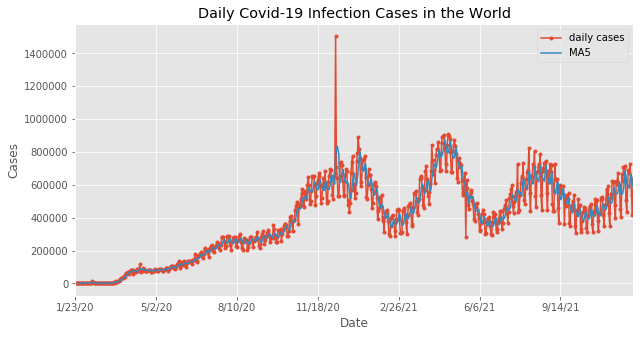

In [5]:
#the daily cases of Covid-19 in the world.
count = []
for i in range(1,len(df0)):
    count.append(sum(pd.to_numeric(df0.iloc[i,1:].values)))

df = pd.DataFrame()
df["Date"] = df0["Country/Region"][1:]
df["Cases"] = count
df=df.set_index("Date")

count = []
for i in range(1,len(df1)):
    count.append(sum(pd.to_numeric(df1.iloc[i,1:].values)))

df["Deaths"] = count

df.Cases.plot(title="Daily Covid-19 Infection Cases in the World",marker=".",figsize=(10,5),label="daily cases")
df.Cases.rolling(window=5).mean().plot(figsize=(10,5),label="MA5")
plt.ylabel("Cases")
plt.legend()
plt.show()

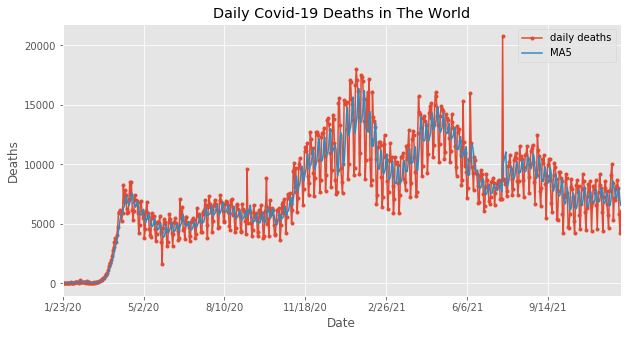

In [7]:
#the daily death cases of Covid-19 in the world.
df.Deaths.plot(title="Daily Covid-19 Deaths in The World",marker=".",figsize=(10,5),label="daily deaths")
df.Deaths.rolling(window=5).mean().plot(figsize=(10,5),label="MA5")
plt.ylabel("Deaths")
plt.legend()
plt.show()

Covid-19 Cases Prediction for The Next 30 Days using Prophet Model in Python 

In [40]:
#prepare prophet

class Fbprophet(object):
    def fit(self,data):
        
        self.data  = data
        self.model = Prophet(weekly_seasonality=True,daily_seasonality=False,yearly_seasonality=False)
        self.model.fit(self.data)
    
    def forecast(self,periods,freq):
        
        self.future = self.model.make_future_dataframe(periods=periods,freq=freq)
        self.df_forecast = self.model.predict(self.future)
        
    def plot(self,xlabel="Years",ylabel="Values"):
        
        self.model.plot(self.df_forecast,xlabel=xlabel,ylabel=ylabel,figsize=(9,4))
        self.model.plot_components(self.df_forecast,figsize=(9,6))
        
    def R2(self):
        return r2_score(self.data.y, self.df_forecast.yhat[:len(df)])
    
    def MSE(self):
        return mean_squared_error(self.data.y, self.df_forecast.yhat[:len(df)])
    
    def MAE(self):
        return mean_absolute_error(self.data.y, self.df_forecast.yhat[:len(df)])

In [41]:
#change the names of these columns to ds and y as required by fbprophet.
#fbprophet doesn't like the index to be a datetime.
#it wants to see ds as a non-index column, 
#so we won't set an index differently than the integer index.
df_fb  = pd.DataFrame({"ds":[],"y":[]})
df_fb["ds"] = pd.to_datetime(df.index)
df_fb["y"]  = df.iloc[:,0].values
df_fb.head()

,ds,y
0,2020-01-23,98.0
1,2020-01-24,286.0
2,2020-01-25,493.0
3,2020-01-26,684.0
4,2020-01-27,809.0


In [42]:
#modelling data
model = Fbprophet()
model.fit(df_fb)
model.forecast(30,"D")

A plotting mechanism of Prophet called plot draws the original data in black
dots whereas blue line is the model and the error of the forecast in shaded
blue area.

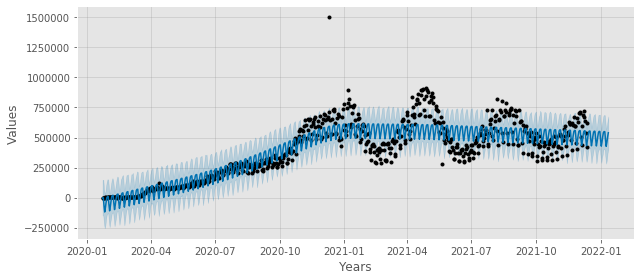

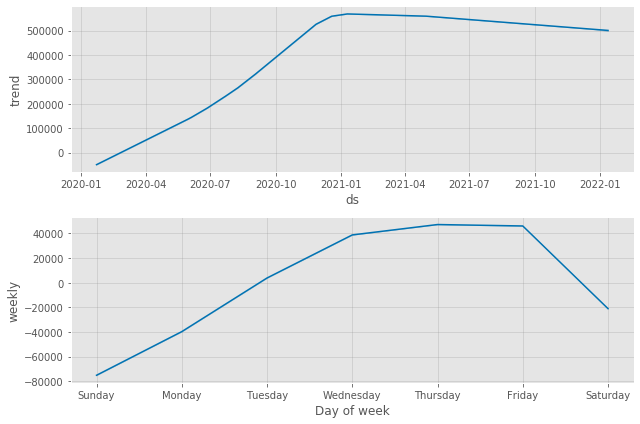

In [43]:
#Plotting Prophet results (component wise forecast)
model.plot()

In [49]:
#forecasting for the next 365 days(year)
#modelling data
model1 = Fbprophet()
model1.fit(df_fb)
model1.forecast(365,"D")

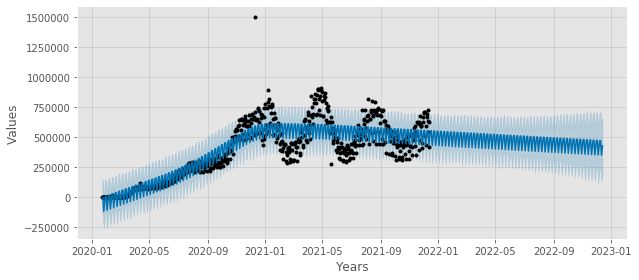

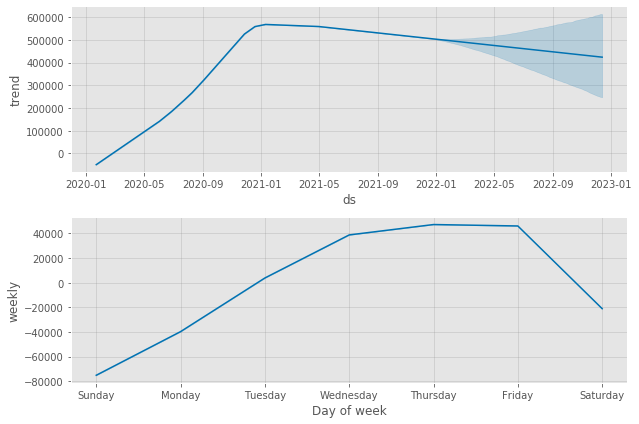

In [50]:
#Plotting Prophet results for next year cases prediction (component wise forecast)
model1.plot()

In [44]:
#The resulting forecast dataframe contains quite a bit of data, 
#but we will flag out few important columns ("ds","yhat_lower","yhat_upper","yhat").
forecast = model.df_forecast[["ds","yhat_lower","yhat_upper","yhat"]].tail(30).reset_index().set_index("ds").drop("index",axis=1)
forecast.head()

,yhat_lower,yhat_upper,yhat
ds,,,
2021-12-14,373647.344203,658092.500953,511373.901146
2021-12-15,411692.277558,682479.529011,546115.453247
2021-12-16,409525.341092,703176.145761,554316.111392
2021-12-17,415463.716505,696736.615692,552929.736776
2021-12-18,349460.467486,629207.674333,485552.685971


In [46]:
model.R2() #this is to calculate R-Squared value

0.7853366638325104

In [45]:
model.MSE() #this is to calculate MSE

12109552012.418383

In [47]:
model.MAE() #this is to calculate MAE

82298.11592017005

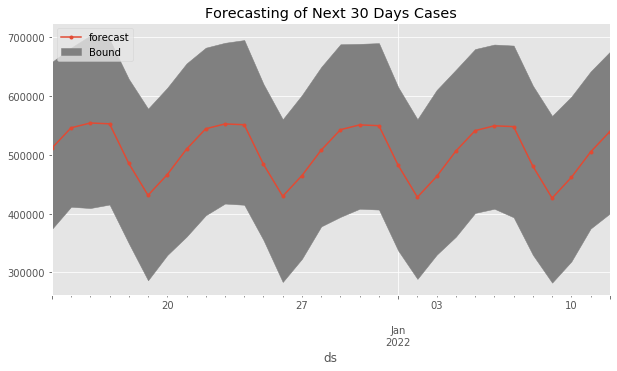

In [48]:
#Plotting the forecasting data of the next 30 days Covid infection cases using pandas' plot function
pd.plotting.register_matplotlib_converters()
forecast["yhat"].plot(marker=".",figsize=(10,5))
plt.fill_between(x=forecast.index, y1=forecast["yhat_lower"], y2=forecast["yhat_upper"],color="gray")
plt.legend(["forecast","Bound"],loc="upper left")
plt.title("Forecasting of Next 30 Days Cases")
plt.show()

sources : https://www.kaggle.com/midouazerty/covid-19-cases-prediction-for-the-next-30-day , https://www.kaggle.com/nalkrolu/covid19-forecasting-of-next-30-days-cases and https://nextjournal.com/eric-brown/forecasting-with-prophet-part-4 by Eric D. Brown, D.Sc.